In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

df = pd.read_csv('/home/minhvu/Desktop/Py4DS/cuối kì/2020/bank_marketing/bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#**B. Processing data**

##**1. Pre-processing data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Loai gia tri trung**

In [5]:
N = len(df)  # Count the number of rows in data
print(N)     

df.drop_duplicates(inplace = True) # df after dropping duplicates
print("The new dimension after checking duplicate & removing is:\t (%s, %s)"%(df.shape)) #size of data (rows,columns)
print('There are %s observations is duplicated, take %s percentage on total dataset'%(N - len(df), 
                                                                                      round(100*(N - len(df))/N, 2)))

45211
The new dimension after checking duplicate & removing is:	 (45211, 17)
There are 0 observations is duplicated, take 0.0 percentage on total dataset


**Remove outliers (Loại bỏ các giá trị ngoại lai))**

In [6]:
### Tìm IQR của dữ liệu
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
## Loại bỏ outlier
outlier_condition = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
df = df[~outlier_condition]
df.shape

(45211, 17)

**Drop column according to NAN percentage for dataframe**

In [7]:
df=df = df.loc[:, df.isnull().mean() < .8] # remove all columns has values which be NAN accounting for >= 80%

df.shape

(45211, 17)

#**2. EDA** (Explotary Data Analysis)

**Summary-statistic**

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,44724.000000,40482.000000,45211.000000,41976.000000,42147.000000,36954.0,36954.0
mean,40.545524,640.636233,15.806419,203.490947,2.129950,-1.0,0.0
std,9.978232,844.435442,8.322476,140.805074,1.315842,0.0,0.0
min,18.000000,-1944.000000,1.000000,0.000000,1.000000,-1.0,0.0
25%,33.000000,46.000000,8.000000,98.000000,1.000000,-1.0,0.0
50%,39.000000,349.000000,16.000000,167.000000,2.000000,-1.0,0.0
75%,48.000000,980.750000,21.000000,277.000000,3.000000,-1.0,0.0
max,70.000000,3462.000000,31.000000,643.000000,6.000000,-1.0,0.0


In [9]:
# Set 'y' = 'deposit' (y = {No_deposit, Yes_deposit})

# Build a function to show categorical values disribution
def plot_bar(column):
    # temp df 
    temp_1 = pd.DataFrame()
    # count categorical values
    temp_1['No_deposit'] = df[df['y'] == 'no'][column].value_counts()
    temp_1['Yes_deposit'] = df[df['y'] == 'yes'][column].value_counts()
    temp_1.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Number of clients')
    plt.title('Distribution of {} and deposit'.format(column))
    plt.show();

In [10]:
# Build a function to show categorical values disribution
def plot_bar_stacked(column):
    # temp df 
    temp_1 = pd.DataFrame()
    # count categorical values
    temp_1['Open Deposit'] = df[df['y'] == 'yes'][column].value_counts()/(df[column].value_counts())
    temp_1.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Reponse Rate %')
    plt.title('Reponse Rate on offer'.format(column))
    plt.show();


**Bar**

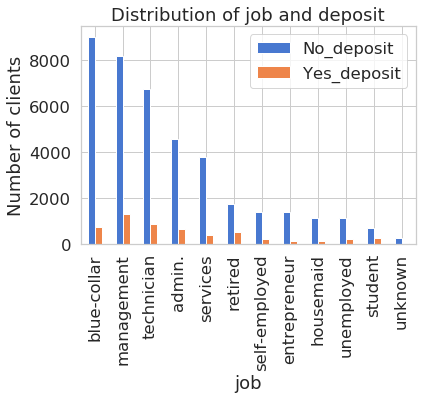

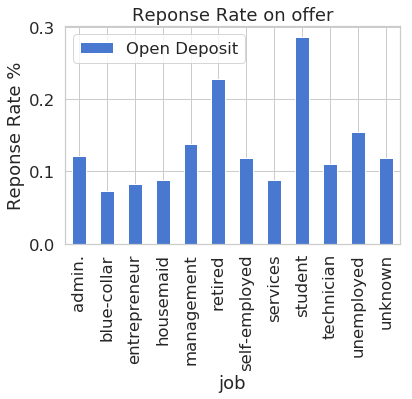

(None, None)

In [11]:
plot_bar('job'), plot_bar_stacked('job')

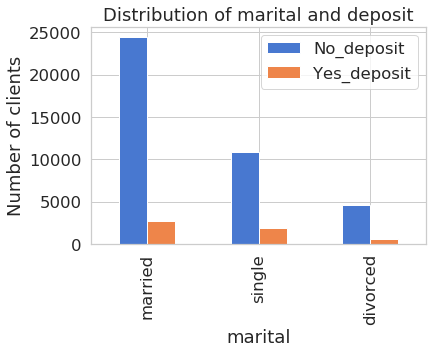

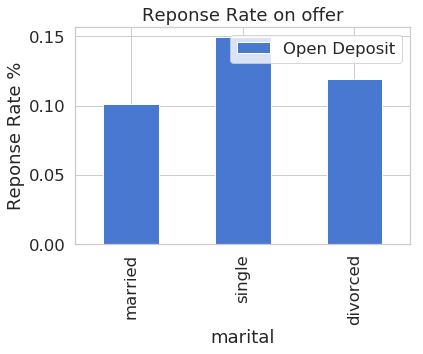

(None, None)

In [12]:
plot_bar('marital'), plot_bar_stacked('marital')

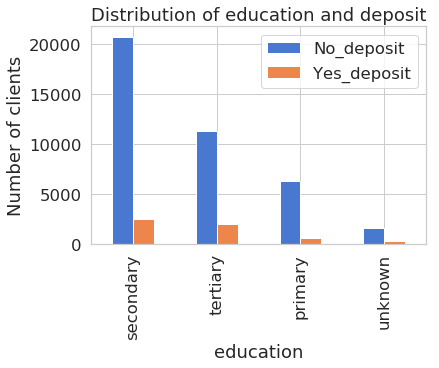

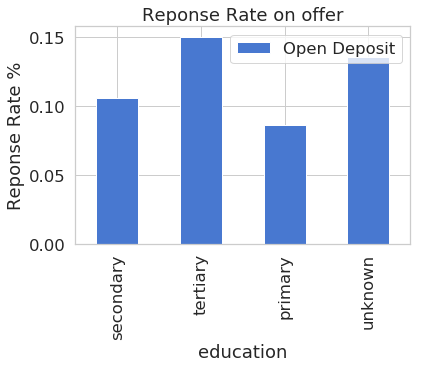

(None, None)

In [13]:
plot_bar('education'), plot_bar_stacked('education')

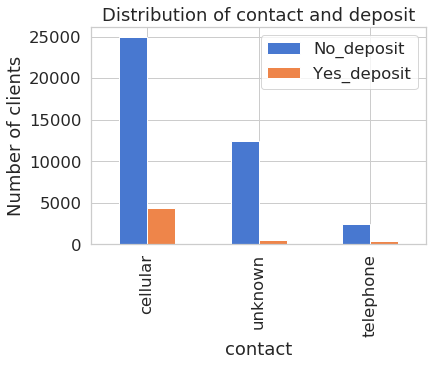

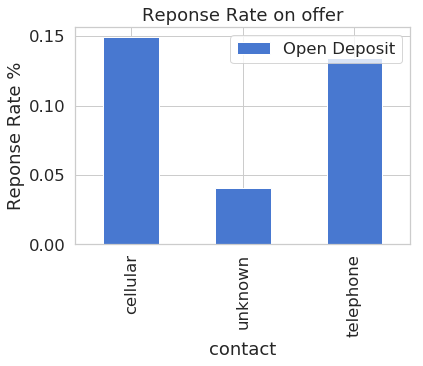

(None, None)

In [14]:
plot_bar('contact'), plot_bar_stacked('contact')

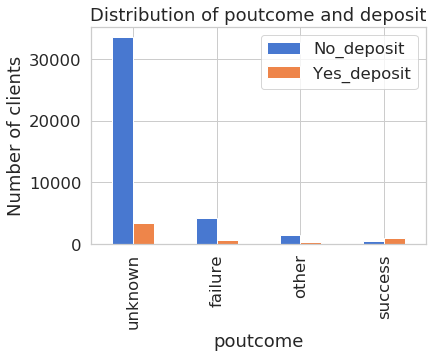

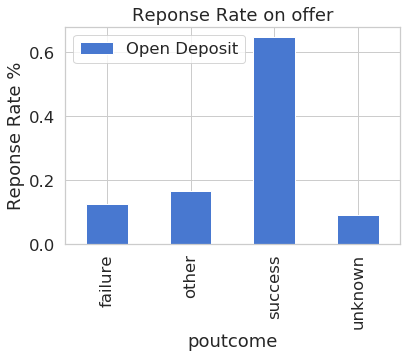

(None, None)

In [15]:
plot_bar('poutcome'), plot_bar_stacked('poutcome')

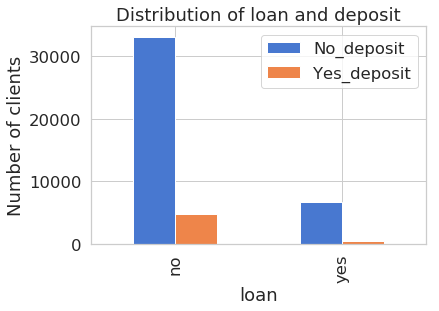

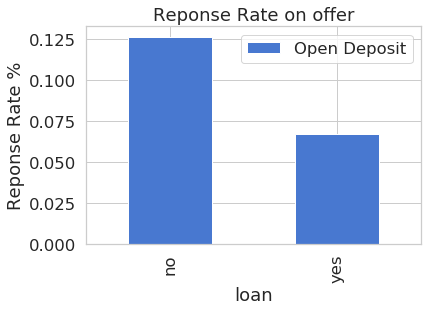

(None, None)

In [16]:
plot_bar('loan'), plot_bar_stacked('loan')

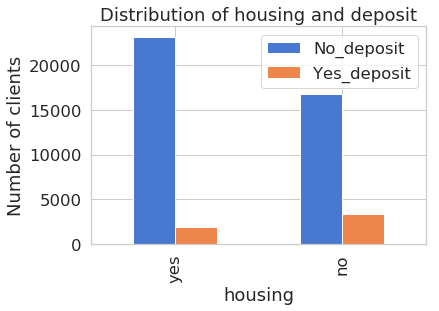

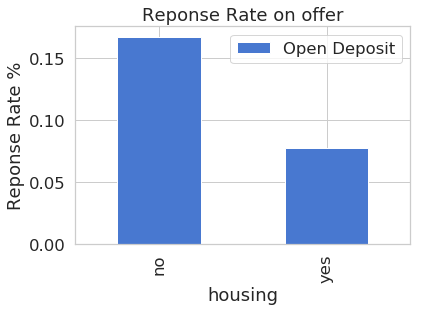

(None, None)

In [17]:
plot_bar('housing'), plot_bar_stacked('housing')

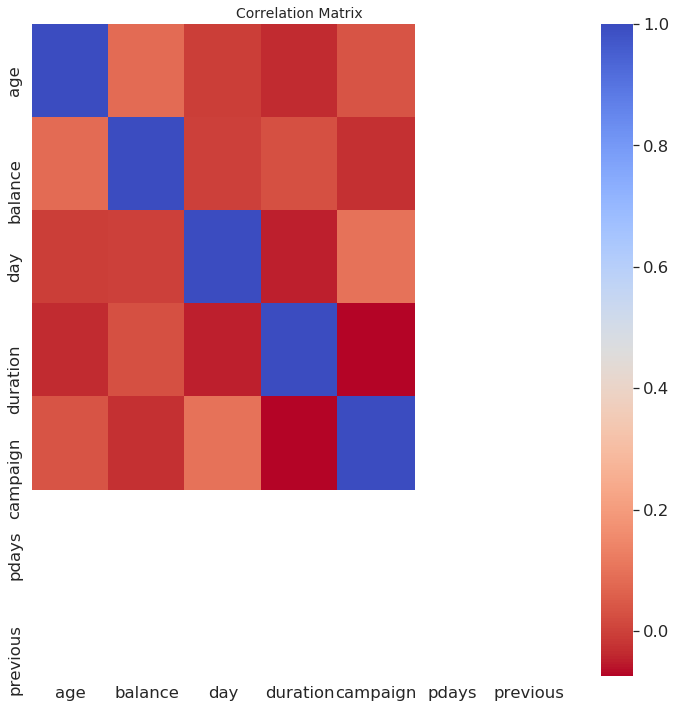

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 12))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax)
ax.set_title("Correlation Matrix", fontsize=14);

#**C. Train-Test**

**Xử lý các dữ liệu category**

In [19]:
df= df.drop(columns=['day','month'],axis = 1)

In [20]:
cleaned_data  = pd.get_dummies(df)
cleaned_data.shape

(45211, 40)

In [21]:
from sklearn.preprocessing import LabelEncoder
df = df.apply(LabelEncoder().fit_transform)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,3019,1,0,2,261,0,0,0,3,0
1,26,9,2,1,0,928,1,0,2,151,0,0,0,3,0
2,15,2,1,1,0,901,1,1,2,76,0,0,0,3,0
3,29,1,1,3,0,2403,1,0,2,92,0,0,0,3,0
4,15,11,2,3,0,900,0,0,2,198,0,0,0,3,0


**Select features**

In [22]:
y = df['y']
X = df[['duration','pdays','previous','poutcome','housing','contact','age','balance','campaign','marital']]

**Train - Test**

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#**D. Choose model**

##**Logistic Regression**

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

clf = LogisticRegression(max_iter = len(y_train))
clf.fit(X_train,y_train)

print("Logistic Regression")
print("\ntrain acc: ", accuracy_score(y_train, clf.predict(X_train)))
print("test acc: ", accuracy_score(y_test, clf.predict(X_test)))
print('\nConfusion matrix : \n', confusion_matrix(y_test, clf.predict(X_test)))
print('Classification report : \n', classification_report(y_test, clf.predict(X_test), digits = 5))

Logistic Regression

train acc:  0.8850127974215566
test acc:  0.884473606605721

Confusion matrix : 
 [[11752   214]
 [ 1353   245]]
Classification report : 
               precision    recall  f1-score   support

           0    0.89676   0.98212   0.93750     11966
           1    0.53377   0.15332   0.23821      1598

    accuracy                        0.88447     13564
   macro avg    0.71526   0.56772   0.58785     13564
weighted avg    0.85399   0.88447   0.85511     13564



##**Random Forest Classifier**

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

print("Random Forest Classifier")
print("\ntrain acc: ", accuracy_score(y_train, clf.predict(X_train)))
print("test acc: ", accuracy_score(y_test, clf.predict(X_test)))
print('\nConfusion matrix : \n', confusion_matrix(y_test, clf.predict(X_test)))
print('Classification report : \n', classification_report(y_test, clf.predict(X_test), digits = 5))

Random Forest Classifier

train acc:  0.9999052042847664
test acc:  0.8994396933058095

Confusion matrix : 
 [[11535   431]
 [  933   665]]
Classification report : 
               precision    recall  f1-score   support

           0    0.92517   0.96398   0.94418     11966
           1    0.60675   0.41615   0.49369      1598

    accuracy                        0.89944     13564
   macro avg    0.76596   0.69006   0.71893     13564
weighted avg    0.88766   0.89944   0.89110     13564

